In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
distribuicao_renda = pd.read_csv('../dados/distribuicao-renda.csv', delimiter = ';', encoding='ISO-8859-1')
municipios = pd.read_csv('../dados/municipios.csv', delimiter = ';', encoding='ISO-8859-1')
arrecadacao_cnae = pd.read_csv('../dados/arrecadacao-cnae.csv', delimiter = ';',encoding='ISO-8859-1')
arrecadacao = pd.read_excel('../dados/arrecadacao-da-receita-administrada-pela-rfb-por-municipio-2018.xlsx', skiprows=5)

/home/sophia/.local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


#Distribuição de renda

In [7]:
distribuicao_renda.head()

,ï»¿Ano-calendÃ¡rio,Ente Federativo,Centil,Quantidade de Contribuintes,Rendimentos Tributaveis - Limite Superior da RTB do Centil [R$ milhÃµes],Rendimentos Tributaveis - Soma da RTB do Centil [R$ milhÃµes],Rendimentos Tributaveis - RTB Acumulada do Centil [R$ milhÃµes],Rendimentos Tributaveis - MÃ©dia da RTB do Centil [R$],Rendimentos Sujeitos Ã Tribut. Exclusiva [R$ milhÃµes],Rendimentos Isentos - Lucros e dividendos [R$ milhÃµes],Rendimentos Isentos - Rendim. SÃ³cio/Titular ME/EPP Opt SIMPLES [R$ milhÃµes],Rendimentos Isentos - Outros Rendimentos Isentos [R$ milhÃµes],Despesas DedutÃ­veis - PrevidÃªncia [R$ milhÃµes],Despesas DedutÃ­veis - Dependentes [R$ milhÃµes],Despesas DedutÃ­veis - InstruÃ§Ã£o [R$ milhÃµes],Despesas DedutÃ­veis - MÃ©dicas [R$ milhÃµes],Despesas DedutÃ­veis - PensÃ£o AlimentÃ­cia [R$ milhÃµes],Despesas DedutÃ­veis - Livro-Caixa [R$ milhÃµes],Imposto Devido [R$ milhÃµes],Bens e Direitos - ImÃ³veis [R$ milhÃµes],Bens e Direitos - MÃ³veis [R$ milhÃµes],Bens e Direitos - Financeiros [R$ milhÃµes],Bens e Direitos - Outros Bens e Direitos [R$ milhÃµes],DÃ­vidas e Ãnus [R$ milhÃµes]
0,2006,BRASIL,1,241.563,NaN,NaN,NaN,NaN,"235,61","481,27","27,37","1.694,49",NaN,NaN,NaN,NaN,NaN,NaN,"0,16","5.281,59","686,21","6.549,15","1.006,40","1.610,39"
1,2006,BRASIL,2,241.563,NaN,NaN,NaN,NaN,"208,74","483,44","29,36","1.675,01",NaN,NaN,NaN,NaN,NaN,NaN,"0,22","5.295,48","668,82","5.762,77","681,75","694,12"
2,2006,BRASIL,3,241.562,NaN,NaN,NaN,NaN,"219,96","459,87","27,63","1.683,04",NaN,NaN,NaN,NaN,NaN,NaN,"0,31","5.566,27","670,64","5.451,95","377,17","650,98"
3,2006,BRASIL,4,241.563,NaN,NaN,NaN,NaN,"257,01","481,93","31,77","1.699,89",NaN,NaN,NaN,NaN,NaN,NaN,"0,17","5.860,02","678,44","6.104,09","256,16","1.079,20"
4,2006,BRASIL,5,241.562,NaN,NaN,NaN,NaN,"249,88","464,23","28,11","1.697,17",NaN,NaN,NaN,NaN,NaN,NaN,"0,17","5.193,31","682,38","5.592,52","269,28","671,97"


**Ente Federativo**: Indica a região geográfica, que pode ser crucial para identificar padrões de consumo regionais.

**Rendimentos Tributáveis - Soma da RTB do Centil [R$ milhões]**: Esta variável pode ser útil para entender o poder aquisitivo da população em diferentes regiões, o que influencia diretamente o potencial de consumo.

R**endimentos Isentos - Lucros e dividendos [R$ milhões] e Outros Rendimentos Isentos [R$ milhões]**: Estes dados podem fornecer insights sobre a distribuição de riqueza e renda disponível para consumo.

**Bens e Direitos - Imóveis [R$ milhões], Móveis [R$ milhões], Financeiros [R$ milhões]**: Estas variáveis podem ajudar a entender o investimento em ativos na região, que indiretamente pode indicar o potencial econômico da área. Pode não ser tão interessantes, mas dependendo de produtos mais nichados é uma variável relevante.

#Municipios

In [8]:
municipios.head()

,CÓDIGO DO MUNICÍPIO - TOM,CÓDIGO DO MUNICÍPIO - IBGE,MUNICÍPIO - TOM,MUNICÍPIO - IBGE,UF
0,1,1100106,GUAJARÁ-MIRIM,Guajará-Mirim,RO
1,2,1100379,ALTO ALEGRE DOS PARECIS,Alto Alegre dos Parecis,RO
2,3,1100205,PORTO VELHO,Porto Velho,RO
3,4,1100452,BURITIS,Buritis,RO
4,5,1100122,JI-PARANÁ,Ji-Paraná,RO


Esse DataFrame se torna interessante para as traduções em demais DataFrames, já que conta com o código IBGE, Código do UF, Município e UF.

#Arrecadação da receita administrativa

In [15]:
arrecadacao.head()

,MUNICÍPIOS,UF,ARRECADAÇÃO
0,ABADIA DE GOIAS,GO,9509713.49
1,ABADIA DOS DOURADOS,MG,3457362.00
2,ABADIANIA,GO,8996131.56
3,ABAETE,MG,16060311.20
4,ABAETETUBA,PA,28281622.15


**Municípios**: Essa variável é crucial para análises geográficas. Ela permite identificar onde estão concentradas as maiores arrecadações, o que pode ser um indicador de maior atividade econômica e, por extensão, maior potencial de consumo.

**UF (Unidade Federativa)**: Similar aos municípios, mas em uma escala mais ampla. Permite comparações entre diferentes estados e regiões do Brasil, ajudando a entender diferenças regionais no potencial de consumo.

**Arrecadação**: Esta variável é um forte indicador do tamanho e da atividade econômica de um município ou região. Municípios com maiores volumes de arrecadação podem ser mercados mais atraentes para o setor alimentício.

#Arrecadação por CNAE

In [14]:
arrecadacao_cnae.head()

,Ano,Mês,Seção - Sigla,Seção - Nome,II,IE,IPI,IRPF,IRPJ,IRRF,IOF,ITR,Cofins,Pis/Pasep,CSLL,Cide,Contribuição Previdenciária,CPSSS,Pagamento Unificado,Outras Receitas Administradas,Receitas Não Administradas,Unnamed: 21
0,2016,Jan,A,"Agricultura, pecuária, prod. florestal, pesca ...","2.742.218,39",NaN,"893.858,53",NaN,"146.667.897,73","49.347.429,86","609.206,80","2.222.251,21","37.609.112,67","8.484.832,27","77.514.368,33","142.078,76","8.008.290,28",NaN,"41.971.216,43","3.377.850,67","1.511.240,76",NaN
1,2016,Jan,B,Indústrias extrativas,"42.899.799,99",NaN,"24.953.912,90",NaN,"516.453.293,87","163.430.757,24","1.230.716,94","2.391.927,42","122.691.146,84","25.694.934,49","212.367.626,69","13.041.968,55","11.200.042,79",NaN,"160.988.934,95","1.448.689,59","613.493.926,42",NaN
2,2016,Jan,C,Indústrias de transformação,"1.633.818.001,81","1.040.859,45","2.849.757.405,91","9.117,98","3.010.670.002,51","3.359.712.444,44","109.169.789,55","630.487,68","6.030.543.304,24","1.295.735.323,12","1.325.159.277,67","623.615.800,05","646.795.525,63","1.263,79","1.951.565.530,42","95.494.213,69","2.453.095.402,77",NaN
3,2016,Jan,D,Eletricidade e gás,"5.328.420,02",NaN,"2.175.445,33",NaN,"995.310.108,75","547.590.056,38","12.592.106,13","920.472,99","1.352.860.067,31","298.104.642,79","425.645.649,12","2.746.902,33","680.414,86",NaN,"179.025.502,78","865.732,36","1.646.606,00",NaN
4,2016,Jan,E,"Água, esgoto, ativ. de gestão de resíduos e de...","354.256,59",NaN,"1.432.422,12",NaN,"53.338.128,20","157.670.948,54","532.902,88","6.683,00","223.045.284,90","56.909.464,06","26.390.887,65","73.401,70","7.286.865,92",NaN,"59.672.185,90","515.722,66","714.449,10",NaN


**Ano e Mês**: Permite analisar tendências e variações sazonais na arrecadação, o que pode refletir mudanças no consumo.

**Seção - Sigla e Nome**: Essencial para identificar setores específicos da economia. A seção relacionada ao setor alimentício é particularmente importante.

**Impostos e contribuições específicos (ex: II, IE, IPI, IRPF, IRPJ, Cofins, Pis/Pasep, CSLL, etc.)**: Esses valores fornecem uma noção do tamanho e da saúde financeira dos setores econômicos, o que é útil para avaliar o potencial de consumo.

**Receitas Administradas e Não Administradas**: Dão uma visão geral da arrecadação total, o que pode ser usado para avaliar a atividade econômica geral em diferentes regiões ou setores.

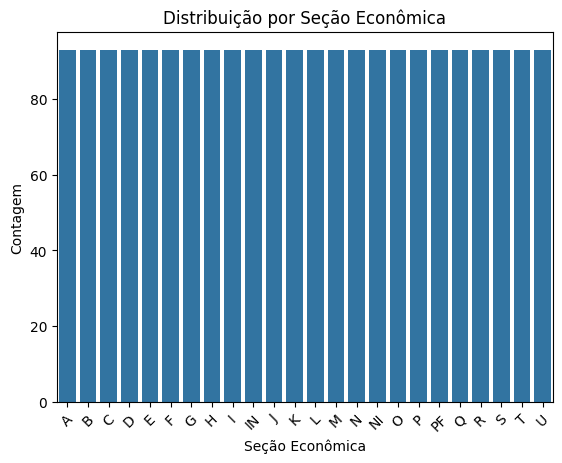

In [18]:
sns.countplot(data=arrecadacao_cnae, x='Seção - Sigla')
plt.title('Distribuição por Seção Econômica')
plt.xlabel('Seção Econômica')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()